# <b> Nhóm 2
- Phạm Như Ngọc
- Lê Duy Quang

### Importing libararies

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, recall_score, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Nhập dữ liệu


In [183]:
data = pd.read_csv('dataset.csv', header = 0)
df = pd.DataFrame(data)
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Xử lý dữ liệu

### Kích thước dữ liệu


In [184]:
df.shape

(76685, 50)

Dữ liệu có 100000 hàng và 50 cột

### Kiểu dữ liệu

In [185]:
df.dtypes

local_ref_1                      object
vn_marital_status                object
resid_province                  float64
resid_district                  float64
resid_wards                     float64
birth_incorp_date               float64
 amount_week                    float64
max_amount_week                 float64
min_amount_week                 float64
distinct_payment_code_week      float64
count_payment_code_week         float64
distinct_trans_group_week       float64
distinct_ref_no_week            float64
amount_month                    float64
max_amount_month                float64
min_amount_month                float64
distinct_payment_code_month     float64
count_payment_code_month        float64
distinct_trans_group_month      float64
distinct_ref_no_month           float64
amount_3month                   float64
max_amount_3month               float64
min_amount_3month               float64
distinct_payment_code_3month    float64
count_payment_code_3month       float64


- Tất cả các trường thông tin đã đúng kiểu dữ liệu
- Tên trường "amount_week" và "total_amt_mar2021" bị thừa khoảng trắng

In [186]:
df = df.rename(columns={' amount_week ': 'amount_week'})
df = df.rename(columns={' total_amt_mar2021 ': 'total_amt_mar2021'})

### Missing values

In [187]:
df.isnull().sum()

local_ref_1                      2046
vn_marital_status                2276
resid_province                   4754
resid_district                   4750
resid_wards                      4752
birth_incorp_date                  11
amount_week                     36095
max_amount_week                 36095
min_amount_week                 36095
distinct_payment_code_week      34400
count_payment_code_week         34400
distinct_trans_group_week       34400
distinct_ref_no_week            34400
amount_month                    19265
max_amount_month                19265
min_amount_month                19265
distinct_payment_code_month     14673
count_payment_code_month        14673
distinct_trans_group_month      14673
distinct_ref_no_month           14673
amount_3month                   12311
max_amount_3month               12311
min_amount_3month               12311
distinct_payment_code_3month        1
count_payment_code_3month           1
distinct_trans_group_3month         1
distinct_ref

### Loại bỏ những cột không sử dụng trong mô hình

In [188]:
df = df.drop(columns=['resid_province','resid_district','resid_wards', 'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021', 'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo', 'balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021', 'most_act_mar2021_count', 'most_act_mar2021'])
df.head()

,local_ref_1,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,2.0,12.0,0.000073,0.000400,5.920000e-06,0.0,0.0,2.0,33.0,NaN
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.000014,0.000068,1.103180e-04,0.0,0.0,2.0,5.0,1.0
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,0.000016,0.000060,2.100000e-05,2.0,3.0,2.0,7.0,NaN
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,3.0,12.0,0.000074,0.000380,5.920000e-07,1.0,11.0,3.0,24.0,NaN


### Mã hóa nhị phân cột giới tính


- Male = 1
- Female = 0

In [189]:
df['Male'] = np.where(df['local_ref_1'] == 'MALE', 1, 0)
df.drop(['local_ref_1'], axis=1, inplace=True)

In [190]:
df.head()

,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,...,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male
0,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,...,12.0,0.000073,0.000400,5.920000e-06,0.0,0.0,2.0,33.0,NaN,1
1,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,...,1.0,0.000014,0.000068,1.103180e-04,0.0,0.0,2.0,5.0,1.0,1
2,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,...,2.0,0.000016,0.000060,2.100000e-05,2.0,3.0,2.0,7.0,NaN,1
3,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,1
4,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,...,12.0,0.000074,0.000380,5.920000e-07,1.0,11.0,3.0,24.0,NaN,1


### Mã hóa nhị phân cột "Tình trạng hôn nhân"

- Single = 1, tất cả các giá trị còn lại bằng 0 (Single và Married chiếm đa số, các tình trạng còn lại là số ít nên để đơn giản hóa, tình trạng hôn nhân bao gồm "độc thân" và "không độc thân")

In [191]:
df['vn_marital_status'].value_counts()

vn_marital_status
Single       43473
Married      30615
Other          259
Partner         26
Divorced        26
Widow            6
Seperated        4
Name: count, dtype: int64

In [192]:
df['Single'] = np.where(df['vn_marital_status'] == 'Single', 1, 0)
df.drop(['vn_marital_status'], axis=1, inplace=True)

In [193]:
df.head()

,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,...,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single
0,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,...,0.000073,0.000400,5.920000e-06,0.0,0.0,2.0,33.0,NaN,1,0
1,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,...,0.000014,0.000068,1.103180e-04,0.0,0.0,2.0,5.0,1.0,1,1
2,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,...,0.000016,0.000060,2.100000e-05,2.0,3.0,2.0,7.0,NaN,1,0
3,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,1,1
4,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,...,0.000074,0.000380,5.920000e-07,1.0,11.0,3.0,24.0,NaN,1,0


### Tính cột tuổi, xóa cột năm sinh, fill NaN bằng median

In [194]:
df['Age'] = 2021 - df['birth_incorp_date']
df.drop(['birth_incorp_date'], axis=1, inplace=True)

In [195]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1980\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [196]:
df.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age
0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,...,0.000400,5.920000e-06,0.0,0.0,2.0,33.0,NaN,1,0,29.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,...,0.000068,1.103180e-04,0.0,0.0,2.0,5.0,1.0,1,1,35.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,...,0.000060,2.100000e-05,2.0,3.0,2.0,7.0,NaN,1,0,41.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,1.0,NaN,1,1,20.0
4,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,...,0.000380,5.920000e-07,1.0,11.0,3.0,24.0,NaN,1,0,32.0


### Kiểm tra giá trị cột "Age" không hợp lý và xóa các hàng có giá trị cột "Age" không hợp lý

In [197]:
cond_age = df['Age'] > 100
df.loc[cond_age]

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age
18897,0.0,0.000081,0.000023,2.0,3.0,2.0,4.0,0.000244,0.000507,2.960000e-06,...,0.000248,5.920000e-07,2.0,28.0,3.0,53.0,1.0,1,0,242.0
39010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000148,0.000490,1.180000e-05,...,0.000240,1.180000e-05,0.0,0.0,2.0,20.0,NaN,0,0,116.0
47634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000006,0.000016,1.890000e-05,...,0.004000,5.920000e-06,1.0,1.0,3.0,14.0,NaN,1,0,121.0
54895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,1.0,NaN,1,1,137.0
73845,0.0,0.000229,0.001272,0.0,0.0,1.0,1.0,0.000111,0.000286,5.920000e-07,...,0.000140,5.920000e-07,1.0,14.0,2.0,19.0,NaN,1,0,948.0


In [198]:
df = df[df['Age'] <= 100]

In [199]:
df.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age
0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,...,0.000400,5.920000e-06,0.0,0.0,2.0,33.0,NaN,1,0,29.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,...,0.000068,1.103180e-04,0.0,0.0,2.0,5.0,1.0,1,1,35.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,...,0.000060,2.100000e-05,2.0,3.0,2.0,7.0,NaN,1,0,41.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,1.0,NaN,1,1,20.0
4,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,...,0.000380,5.920000e-07,1.0,11.0,3.0,24.0,NaN,1,0,32.0


### Điền các giá trị NaN

- Đối với năm 2020, các trường thông tin giao dịch của tuần trước có NaN được hiểu là không có giao dịch và fill NaN bằng 0 do missing values của các cột amount, min, max tương ứng với nhau, đối với các trường thông tin có giá trị 0 từ trước, fill NaN bằng mode
Tương tự đối với giao dịch của 1 tháng trước và 3 tháng trước

In [200]:
df['distinct_payment_code_week'].value_counts()

distinct_payment_code_week
0.0    29042
1.0    12402
2.0      760
3.0       72
4.0        6
5.0        1
Name: count, dtype: int64

In [201]:
df['count_payment_code_week'].value_counts()

count_payment_code_week
0.0      29042
1.0       8378
2.0       3022
3.0       1050
4.0        399
5.0        176
6.0         83
7.0         42
8.0         23
9.0         19
10.0         9
11.0         8
14.0         4
17.0         3
28.0         3
15.0         2
12.0         2
16.0         2
13.0         2
20.0         2
40.0         1
114.0        1
132.0        1
31.0         1
331.0        1
37.0         1
61.0         1
24.0         1
25.0         1
26.0         1
42.0         1
67.0         1
Name: count, dtype: int64

In [202]:
df['count_payment_code_week'].value_counts()

count_payment_code_week
0.0      29042
1.0       8378
2.0       3022
3.0       1050
4.0        399
5.0        176
6.0         83
7.0         42
8.0         23
9.0         19
10.0         9
11.0         8
14.0         4
17.0         3
28.0         3
15.0         2
12.0         2
16.0         2
13.0         2
20.0         2
40.0         1
114.0        1
132.0        1
31.0         1
331.0        1
37.0         1
61.0         1
24.0         1
25.0         1
26.0         1
42.0         1
67.0         1
Name: count, dtype: int64

In [203]:
df['distinct_trans_group_week'].value_counts()

distinct_trans_group_week
1.0    27263
2.0    12233
3.0     2321
4.0      399
5.0       67
Name: count, dtype: int64

In [204]:
df['distinct_ref_no_week'].value_counts()

distinct_ref_no_week
1.0      11392
2.0       7484
3.0       5156
4.0       3643
5.0       2621
         ...  
78.0         1
86.0         1
103.0        1
174.0        1
85.0         1
Name: count, Length: 134, dtype: int64

In [205]:
def fill_na_for_2020(df, period):
    df[f'amount_{period}'].fillna(0, inplace=True)
    df[f'min_amount_{period}'].fillna(0, inplace=True)
    df[f'max_amount_{period}'].fillna(0, inplace=True)
    df[f'distinct_trans_group_{period}'].fillna(0, inplace=True)
    df[f'distinct_ref_no_{period}'].fillna(0, inplace=True)
    df[f'distinct_payment_code_{period}'].fillna(df[f'distinct_payment_code_{period}'].mode()[0], inplace=True)
    df[f'count_payment_code_{period}'].fillna(df[f'count_payment_code_{period}'].mode()[0], inplace=True)
    return df
periods = ['week', 'month', '3month']
for period in periods:
    fill_na_for_2020(df, period)

C:\Users\User\AppData\Local\Temp\ipykernel_1980\273577446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'amount_{period}'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1980\273577446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

- Nhân các cột liên quan tới số tiền giao dịch với 10^5 để giá trị giữa các trường cân đối 

In [206]:
start_to_multiply = ['amount', 'max_amount', 'min_amount']
end_to_multiply = ['week', 'month', '3month']
for col in df.columns:
    if any(col.startswith(start) and col.endswith(end) for start in start_to_multiply for end in end_to_multiply):
        df[col] *= 1e5

In [207]:
df.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age
0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,5.65,20.4082,0.8280,...,40.00,0.5920,0.0,0.0,2.0,33.0,NaN,1,0,29.0
1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.91,13.9819,20.2648,...,6.85,11.0318,0.0,0.0,2.0,5.0,1.0,1,1,35.0
2,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,3.03,12.2449,14.3495,...,6.00,2.1000,2.0,3.0,2.0,7.0,NaN,1,0,41.0
3,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.00,0.0000,0.0000,...,0.00,0.0000,0.0,0.0,1.0,1.0,NaN,1,1,20.0
4,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,9.65,24.7347,0.1180,...,38.00,0.0592,1.0,11.0,3.0,24.0,NaN,1,0,32.0


- Điền giá trị NaN ở nhóm nợ

In [208]:
df['nhomno_xhtdJuin2021'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1980\3009861124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nhomno_xhtdJuin2021'].fillna(0, inplace=True)


In [209]:
df.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age
0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,5.65,20.4082,0.8280,...,40.00,0.5920,0.0,0.0,2.0,33.0,0.0,1,0,29.0
1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.91,13.9819,20.2648,...,6.85,11.0318,0.0,0.0,2.0,5.0,1.0,1,1,35.0
2,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,3.03,12.2449,14.3495,...,6.00,2.1000,2.0,3.0,2.0,7.0,0.0,1,0,41.0
3,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.00,0.0000,0.0000,...,0.00,0.0000,0.0,0.0,1.0,1.0,0.0,1,1,20.0
4,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,9.65,24.7347,0.1180,...,38.00,0.0592,1.0,11.0,3.0,24.0,0.0,1,0,32.0


### Xử lý cột nhomno_xhtdJuin2021	
Tạo cột "Incredible" từ các giá trị của cột "nhomno_xhtdJuin2021" có giá trị lớn hơn 0 thì điền 1 vào "Incredible", còn lại điền 0

In [210]:
df['Incredible'] = np.where(df['nhomno_xhtdJuin2021'] > 0, 1, 0)

In [211]:
df.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021,Male,Single,Age,Incredible
0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,5.65,20.4082,0.8280,...,0.5920,0.0,0.0,2.0,33.0,0.0,1,0,29.0,0
1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.91,13.9819,20.2648,...,11.0318,0.0,0.0,2.0,5.0,1.0,1,1,35.0,1
2,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,3.03,12.2449,14.3495,...,2.1000,2.0,3.0,2.0,7.0,0.0,1,0,41.0,0
3,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.00,0.0000,0.0000,...,0.0000,0.0,0.0,1.0,1.0,0.0,1,1,20.0,0
4,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,9.65,24.7347,0.1180,...,0.0592,1.0,11.0,3.0,24.0,0.0,1,0,32.0,0


In [212]:
df['Incredible'].value_counts()

Incredible
0    63325
1    13355
Name: count, dtype: int64

In [213]:
df.to_csv('cleaned_data.csv', index=False)

In [214]:
df.drop(columns = ['nhomno_xhtdJuin2021'])

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Male,Single,Age,Incredible
0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,5.6500,20.4082,0.8280,...,40.00,0.5920,0.0,0.0,2.0,33.0,1,0,29.0,0
1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.9100,13.9819,20.2648,...,6.85,11.0318,0.0,0.0,2.0,5.0,1,1,35.0,1
2,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,3.0300,12.2449,14.3495,...,6.00,2.1000,2.0,3.0,2.0,7.0,1,0,41.0,0
3,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,0.00,0.0000,0.0,0.0,1.0,1.0,1,1,20.0,0
4,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,9.6500,24.7347,0.1180,...,38.00,0.0592,1.0,11.0,3.0,24.0,1,0,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76680,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.6800,12.2449,17.7473,...,100.00,0.0592,1.0,4.0,2.0,9.0,0,1,41.0,0
76681,0.0,4.9000,27.2503,0.0,0.0,1.0,1.0,12.1714,55.1020,4.2700,...,228.30,0.5920,2.0,7.0,3.0,24.0,0,0,42.0,0
76682,0.0,408.1633,23.3899,0.0,0.0,1.0,4.0,210.6591,612.2449,6.0900,...,300.00,6.0900,0.0,0.0,1.0,8.0,0,0,33.0,0
76683,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.8500,8.1600,1.8400,...,20.00,1.8400,1.0,1.0,4.0,16.0,1,0,46.0,0


## 3. EDA (Khai phá dữ liệu)

- Lọc các cột của năm 2020 để xây dựng mô hình

In [215]:
selected_columns = ['Male', 'Single', 'Age','amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible']
df[selected_columns].to_csv('data_for_model.csv', index=False)

In [216]:
data2 = pd.read_csv('data_for_model.csv')
df2 = pd.DataFrame(data2)
df2.head()

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
0,1,0,29.0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,...,2.0,12.0,7.35,40.00,0.5920,0.0,0.0,2.0,33.0,0
1,1,1,35.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.38,6.85,11.0318,0.0,0.0,2.0,5.0,1
2,1,0,41.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,2.0,1.57,6.00,2.1000,2.0,3.0,2.0,7.0,0
3,1,1,20.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,1.0,1.0,0
4,1,0,32.0,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,...,3.0,12.0,7.45,38.00,0.0592,1.0,11.0,3.0,24.0,0


- Tính hệ số tương quan

In [217]:
corr_matrix = df2.corr()
corr_matrix

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
Male,1.000000,0.081116,0.017146,-0.020229,-0.031400,-0.002965,0.001266,-0.000222,-0.056493,-0.039252,...,-0.046355,-0.032436,-0.028257,-0.033494,-0.006129,-0.015708,0.003783,-0.050985,-0.038042,0.017441
Single,0.081116,1.000000,-0.510906,-0.042621,-0.086371,-0.036764,-0.063551,-0.027768,-0.123944,-0.057420,...,-0.178643,-0.057607,-0.067111,-0.101292,-0.015675,-0.191753,-0.085189,-0.173254,-0.071971,-0.218625
Age,0.017146,-0.510906,1.000000,0.052434,0.092151,0.060525,0.031474,0.011574,0.051172,0.013224,...,0.091853,0.014354,0.076154,0.116543,0.027519,0.153479,0.046487,0.066662,0.019864,0.179239
amount_week,-0.020229,-0.042621,0.052434,1.000000,0.747371,0.139502,0.015791,0.005785,0.093201,0.221180,...,0.071954,0.184882,0.717894,0.330686,0.005106,0.036443,0.015657,0.064384,0.193575,0.079521
max_amount_week,-0.031400,-0.086371,0.092151,0.747371,1.000000,0.335140,0.038464,0.014780,0.198875,0.187345,...,0.153101,0.153534,0.508246,0.422312,0.013027,0.088780,0.033641,0.144506,0.168582,0.132776
min_amount_week,-0.002965,-0.036764,0.060525,0.139502,0.335140,1.000000,-0.031843,-0.013217,0.031690,-0.007307,...,0.009454,-0.006925,0.048524,0.137913,0.049233,-0.020587,-0.017258,-0.001330,-0.008450,0.002912
distinct_payment_code_week,0.001266,-0.063551,0.031474,0.015791,0.038464,-0.031843,1.000000,0.410625,0.582419,0.182333,...,0.350684,0.134245,0.039185,0.032302,-0.011236,0.408464,0.380219,0.285906,0.142269,0.084741
count_payment_code_week,-0.000222,-0.027768,0.011574,0.005785,0.014780,-0.013217,0.410625,1.000000,0.241602,0.237327,...,0.142312,0.116144,0.019161,0.010587,-0.004626,0.162883,0.695603,0.115286,0.125481,0.033012
distinct_trans_group_week,-0.056493,-0.123944,0.051172,0.093201,0.198875,0.031690,0.582419,0.241602,1.000000,0.362326,...,0.672248,0.277075,0.125972,0.141547,-0.017522,0.409371,0.299751,0.574597,0.295288,0.224345
distinct_ref_no_week,-0.039252,-0.057420,0.013224,0.221180,0.187345,-0.007307,0.182333,0.237327,0.362326,1.000000,...,0.271121,0.912378,0.248328,0.122043,-0.007617,0.180093,0.246427,0.250659,0.784441,0.142919


- Lọc các cặp cột có hệ số tương quan cao

In [218]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('Single', 'Age')
('amount_week', 'max_amount_week')
('distinct_payment_code_week', 'distinct_trans_group_week')
('amount_week', 'amount_month')
('max_amount_week', 'amount_month')
('max_amount_week', 'max_amount_month')
('amount_month', 'max_amount_month')
('distinct_payment_code_week', 'distinct_payment_code_month')
('count_payment_code_week', 'count_payment_code_month')
('distinct_trans_group_week', 'distinct_trans_group_month')
('distinct_payment_code_month', 'distinct_trans_group_month')
('distinct_ref_no_week', 'distinct_ref_no_month')
('amount_week', 'amount_3month')
('max_amount_week', 'amount_3month')
('amount_month', 'amount_3month')
('max_amount_month', 'max_amount_3month')
('min_amount_month', 'min_amount_3month')
('distinct_payment_code_month', 'distinct_payment_code_3month')
('distinct_trans_group_month', 'distinct_payment_code_3month')
('count_payment_code_week', 'count_payment_code_3month')
('count_payment_code_month', 'count_payment_code_

- Các trường thông tin của week, month và 3month đều phụ thuộc lẫn nhau, vì vậy nhóm tách data thành 3 bộ: week, month và three_month với mục đích xác định khoảng thời gian tốt nhất để xác định khách hàng đáng ngờ: nếu bộ week tốt nhất nghĩa là sau 6 tháng, month tốt nhất là 7 tháng và 3month tốt nhất là 9 tháng

In [219]:
week = ['Male', 'Single', 'Age', 'amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'Incredible']
df2[week].to_csv('week.csv', index=False)

In [220]:
month = ['Male', 'Single', 'Age', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'Incredible']
df2[month].to_csv('month.csv', index=False)

In [221]:
three_month = ['Male', 'Single', 'Age', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible']
df2[three_month].to_csv('three_month.csv', index=False)

### 3.1. Dataset Week

In [222]:
week = pd.read_csv('week.csv')
df_week = pd.DataFrame(week)
df_week.head()

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,Incredible
0,1,0,29.0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,0
1,1,1,35.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1
2,1,0,41.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
3,1,1,20.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
4,1,0,32.0,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,0


In [223]:
corr_matrix_week = df_week.corr()
corr_matrix_week

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,Incredible
Male,1.000000,0.081116,0.017146,-0.020229,-0.031400,-0.002965,0.001266,-0.000222,-0.056493,-0.039252,0.017441
Single,0.081116,1.000000,-0.510906,-0.042621,-0.086371,-0.036764,-0.063551,-0.027768,-0.123944,-0.057420,-0.218625
Age,0.017146,-0.510906,1.000000,0.052434,0.092151,0.060525,0.031474,0.011574,0.051172,0.013224,0.179239
amount_week,-0.020229,-0.042621,0.052434,1.000000,0.747371,0.139502,0.015791,0.005785,0.093201,0.221180,0.079521
max_amount_week,-0.031400,-0.086371,0.092151,0.747371,1.000000,0.335140,0.038464,0.014780,0.198875,0.187345,0.132776
min_amount_week,-0.002965,-0.036764,0.060525,0.139502,0.335140,1.000000,-0.031843,-0.013217,0.031690,-0.007307,0.002912
distinct_payment_code_week,0.001266,-0.063551,0.031474,0.015791,0.038464,-0.031843,1.000000,0.410625,0.582419,0.182333,0.084741
count_payment_code_week,-0.000222,-0.027768,0.011574,0.005785,0.014780,-0.013217,0.410625,1.000000,0.241602,0.237327,0.033012
distinct_trans_group_week,-0.056493,-0.123944,0.051172,0.093201,0.198875,0.031690,0.582419,0.241602,1.000000,0.362326,0.224345
distinct_ref_no_week,-0.039252,-0.057420,0.013224,0.221180,0.187345,-0.007307,0.182333,0.237327,0.362326,1.000000,0.142919


In [224]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_week.columns)):
    for j in range(i):
        if abs(corr_matrix_week.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_week.columns[i]
            rowname = corr_matrix_week.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('Single', 'Age')
('amount_week', 'max_amount_week')
('distinct_payment_code_week', 'distinct_trans_group_week')


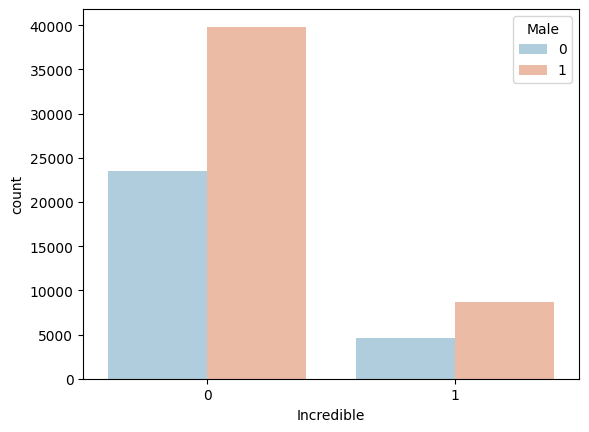

In [225]:
sns.countplot(x='Incredible', hue='Male', data=df_week, palette='RdBu_r')
plt.show()

- Tỷ lệ khách hàng đáng ngờ là nam cao hơn nữ, có thể do trong dữ liệu, số khách hàng nam nhiều hơn số khách hàng nữ

<Axes: xlabel='Age', ylabel='Count'>

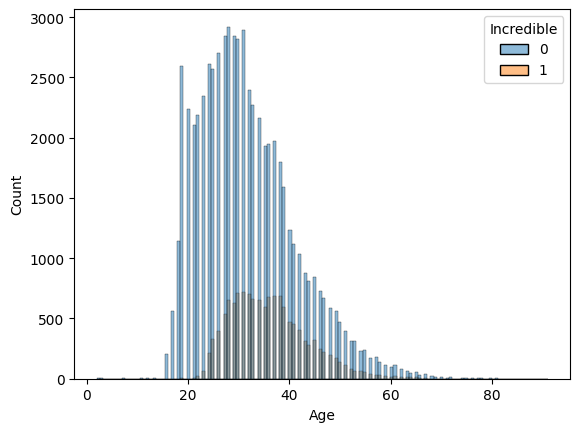

In [226]:
sns.histplot(df_week, x="Age", hue="Incredible") 

Số lượng khách hàng đáng ngờ ở độ tuổi 20-40 lớn hơn khách hàng ở độ tuổi 40-80. Có thể giải thích rằng 20-40 là độ tuổi lao động tương đối năng suất và nhu cầu sử dụng các dịch vụ tiêu dùng và đầu tư nhiều hơn so với các độ tuổi khác

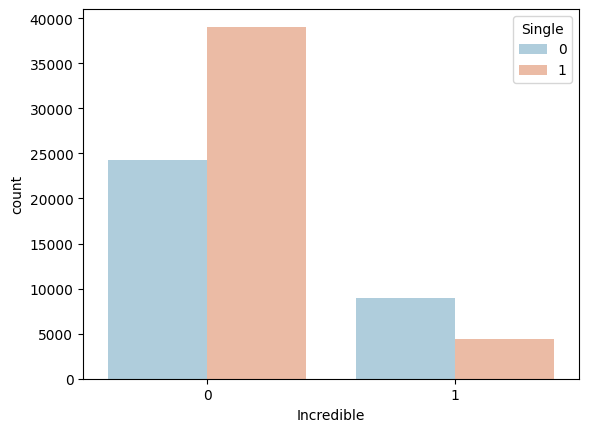

In [227]:
sns.countplot(x='Incredible', hue='Single', data=df_week, palette='RdBu_r')
plt.show()

- Khách hàng có tình trạng hôn nhân khác độc thân chiếm số lượng khách hàng đáng ngờ cao hơn, có thể sử dụng cột "Single" để xây dựng mô hình

<Axes: xlabel='distinct_payment_code_week', ylabel='count'>

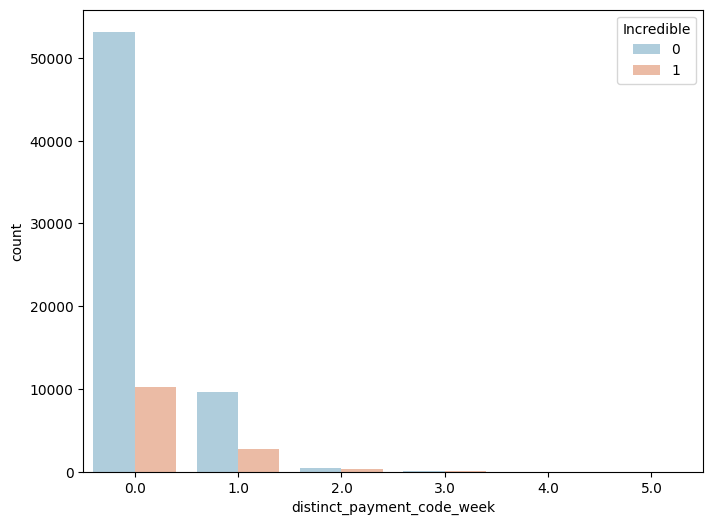

In [228]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_week', hue='Incredible', data=df_week, palette='RdBu_r')

- Khách hàng sử dụng dịch vụ trong tuần trước có khả năng là khách hàng đáng ngờ hơn

<Axes: xlabel='distinct_trans_group_week', ylabel='count'>

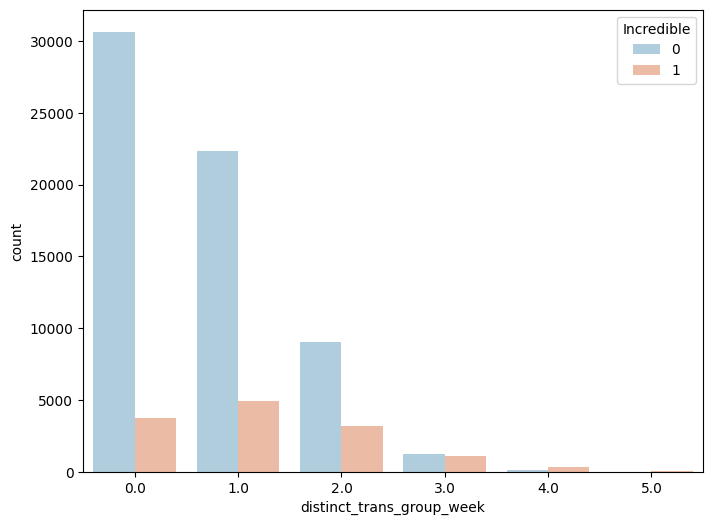

In [229]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_week', hue='Incredible', data=df_week, palette='RdBu_r')

- Khách hàng ở nhóm giao dịch 1 có khả năng là khách hàng đáng ngờ cao hơn
- Cột "distinct_trans_group_week" có tương quan cao với "distinct_payment_code_week". Nhóm sử dụng cột "distinct_payment_code_week" để xây dựng mô hình vì cột "distinct_payment_code_week" thể hiện rõ ràng đặc điểm của khách hàng đáng ngờ hơn cột "distinct_trans_group_week" trong khi hệ số tương quan của 2 cột với cột "Incredible" là như nhau.

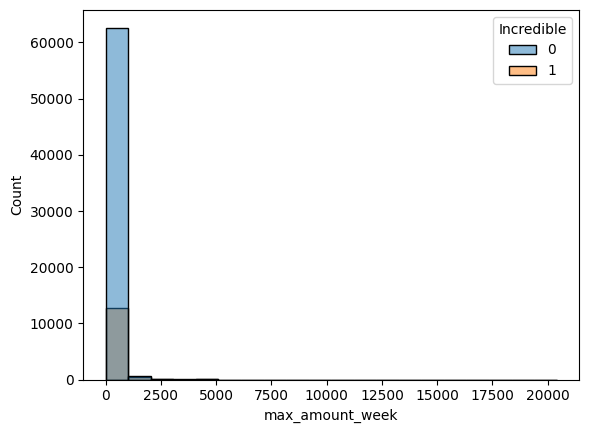

In [230]:
sns.histplot(df_week, x='max_amount_week', hue='Incredible', bins=20)
plt.show()

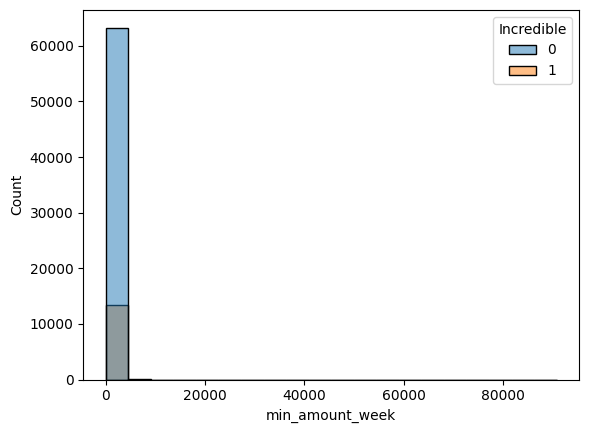

In [231]:
sns.histplot(df_week, x='min_amount_week', hue='Incredible', bins=20)
plt.show()

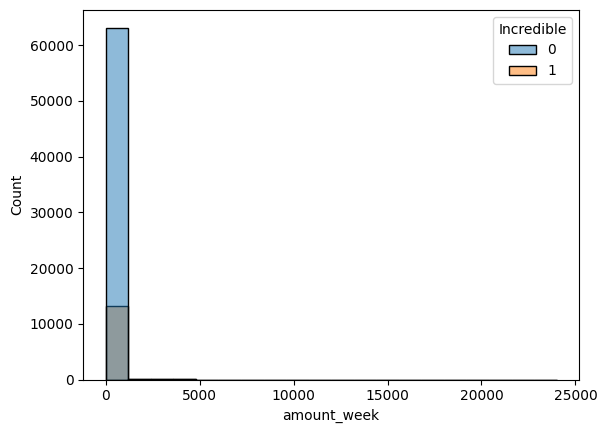

In [232]:
sns.histplot(df_week, x='amount_week', hue='Incredible', bins=20)
plt.show()

- 3 cột amount, max và min có tác động giống nhau tới cột "Incredible"
- Cột amount tương quan cao với cột max nên nhóm không sử dụng cột amount để xây dựng mô hình vì 2 cột max và min cũng phản ánh amount
- Cột min và max phản ánh đầy đủ hơn cột amount, không chỉ tổng số tiền giao dịch hay số tiền giao dịch lớn nhất cao bất thường mới là đáng ngờ mà tổng số tiền giao dịch nhỏ nhất cao bất ngờ cũng là đáng ngờ

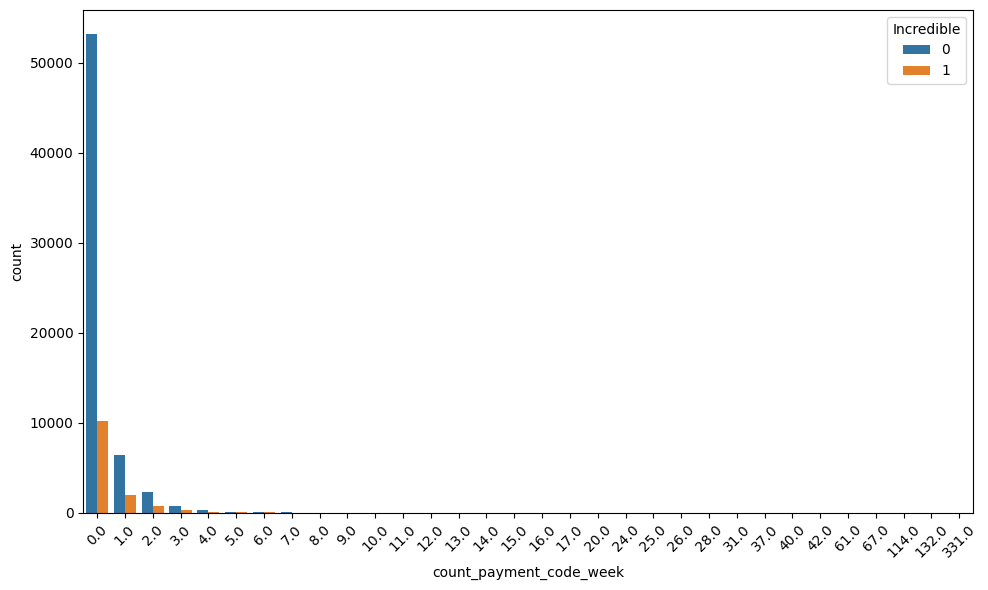

In [233]:
plt.figure(figsize=(10, 6))
sns.countplot(df_week, x='count_payment_code_week', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

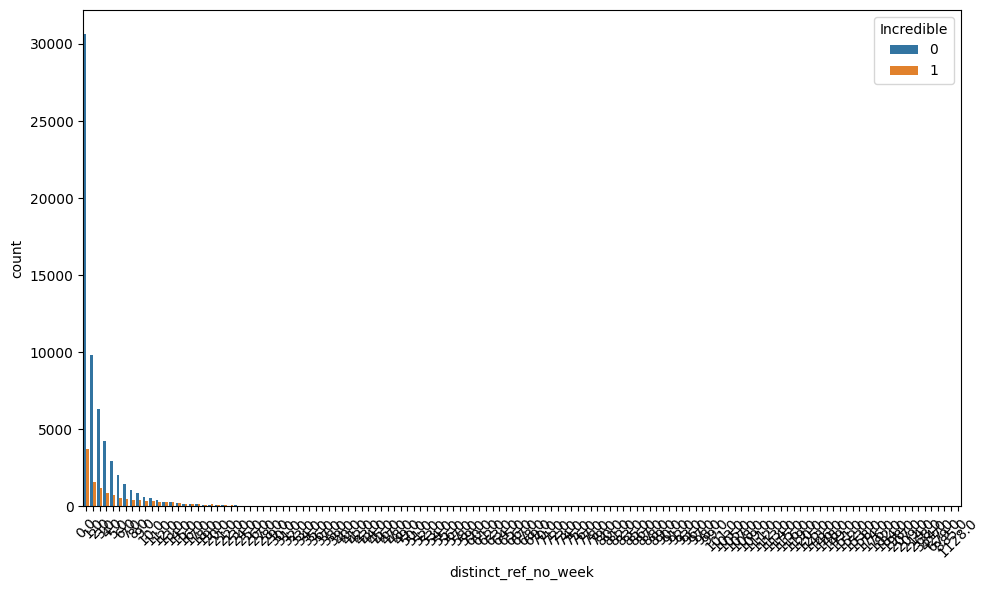

In [234]:
plt.figure(figsize=(10, 6))
sns.countplot(df_week, x='distinct_ref_no_week', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- 2 cột "count_payment_code_week" và "distinct_ref_no_week" đều có ảnh hưởng tới cột "Incredible"
- các cột đều có outliers nhưng trong bài toán xác định khách hàng đáng ngờ, các outliers có thể chính là những khách hàng đáng ngờ nên nhóm không xóa outliers

### 3.2. Dataset Month

- Tương tự với Dataset Week nhưng không cần vẽ lại các cột "Age", "Single", "Male" vì những thông tn đó của khách hàng không thay đổi

In [235]:
month = pd.read_csv('month.csv')
df_month = pd.DataFrame(month)
df_month.head()

,Male,Single,Age,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,Incredible
0,1,0,29.0,5.65,20.4082,0.8280,0.0,0.0,2.0,12.0,0
1,1,1,35.0,1.91,13.9819,20.2648,0.0,0.0,1.0,1.0,1
2,1,0,41.0,3.03,12.2449,14.3495,0.0,0.0,1.0,2.0,0
3,1,1,20.0,0.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0
4,1,0,32.0,9.65,24.7347,0.1180,1.0,5.0,3.0,12.0,0


In [236]:
corr_matrix_month = df_month.corr()
corr_matrix_month

,Male,Single,Age,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,Incredible
Male,1.000000,0.081116,0.017146,-0.026859,-0.029142,-0.005610,-0.012312,0.004493,-0.046355,-0.032436,0.017441
Single,0.081116,1.000000,-0.510906,-0.064529,-0.091106,-0.015511,-0.167436,-0.065787,-0.178643,-0.057607,-0.218625
Age,0.017146,-0.510906,1.000000,0.075034,0.107962,0.028411,0.141773,0.035785,0.091853,0.014354,0.179239
amount_month,-0.026859,-0.064529,0.075034,1.000000,0.596154,0.078941,0.069532,0.036404,0.119248,0.271935,0.111373
max_amount_month,-0.029142,-0.091106,0.107962,0.596154,1.000000,0.425692,0.075724,0.026710,0.158078,0.131204,0.125926
min_amount_month,-0.005610,-0.015511,0.028411,0.078941,0.425692,1.000000,-0.018224,-0.009836,-0.008014,-0.007052,-0.002122
distinct_payment_code_month,-0.012312,-0.167436,0.141773,0.069532,0.075724,-0.018224,1.000000,0.466472,0.582122,0.179882,0.177282
count_payment_code_month,0.004493,-0.065787,0.035785,0.036404,0.026710,-0.009836,0.466472,1.000000,0.305547,0.207248,0.075648
distinct_trans_group_month,-0.046355,-0.178643,0.091853,0.119248,0.158078,-0.008014,0.582122,0.305547,1.000000,0.257604,0.264070
distinct_ref_no_month,-0.032436,-0.057607,0.014354,0.271935,0.131204,-0.007052,0.179882,0.207248,0.257604,1.000000,0.123551


In [237]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_month.columns)):
    for j in range(i):
        if abs(corr_matrix_month.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_month.columns[i]
            rowname = corr_matrix_month.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('Single', 'Age')
('amount_month', 'max_amount_month')
('distinct_payment_code_month', 'distinct_trans_group_month')


<Axes: xlabel='distinct_payment_code_month', ylabel='count'>

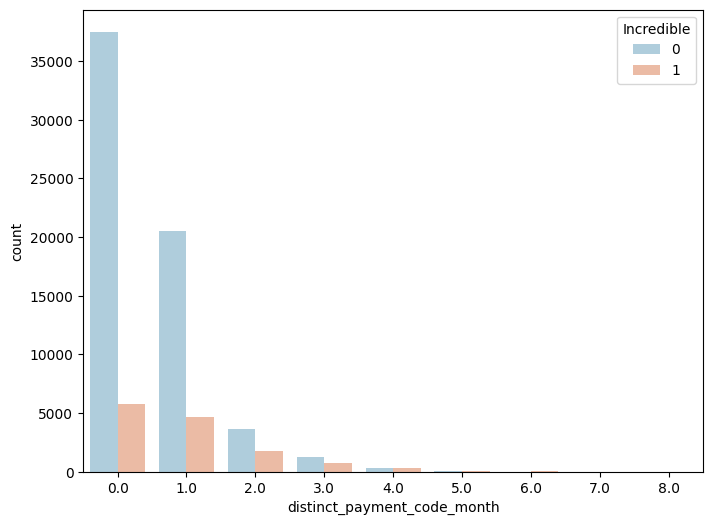

In [238]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_month', hue='Incredible', data=df_month, palette='RdBu_r')

<Axes: xlabel='distinct_trans_group_month', ylabel='count'>

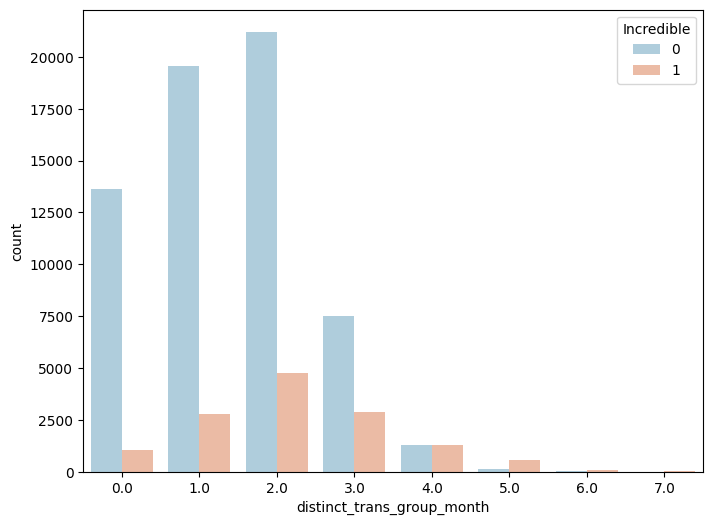

In [239]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_month', hue='Incredible', data=df_month, palette='RdBu_r')

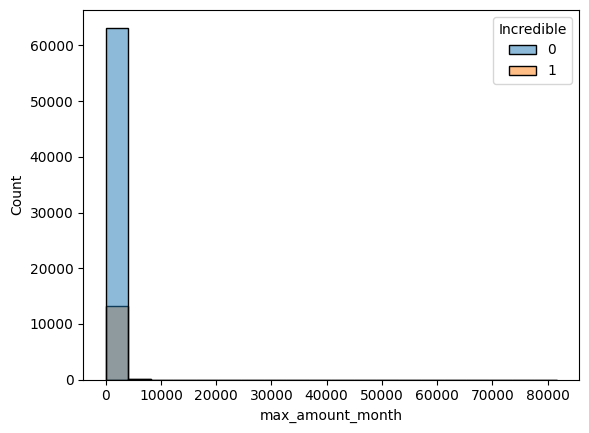

In [240]:
sns.histplot(df_month, x='max_amount_month', hue='Incredible', bins=20)
plt.show()

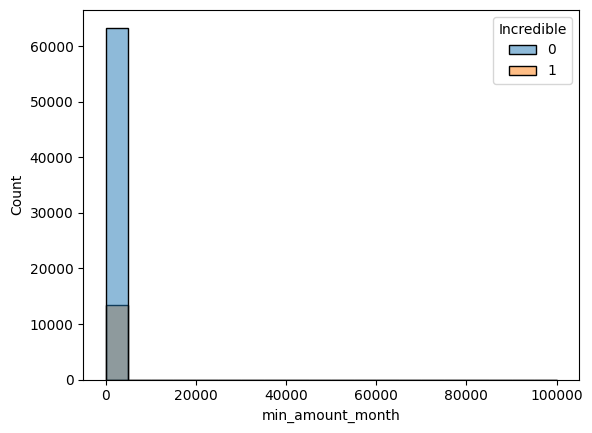

In [241]:
sns.histplot(df_month, x='min_amount_month', hue='Incredible', bins=20)
plt.show()

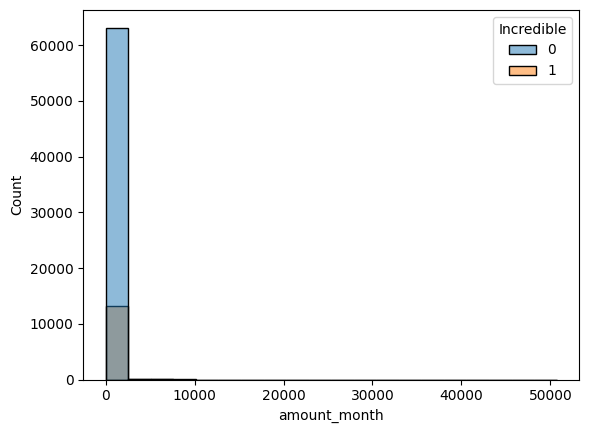

In [242]:
sns.histplot(df_month, x='amount_month', hue='Incredible', bins=20)
plt.show()

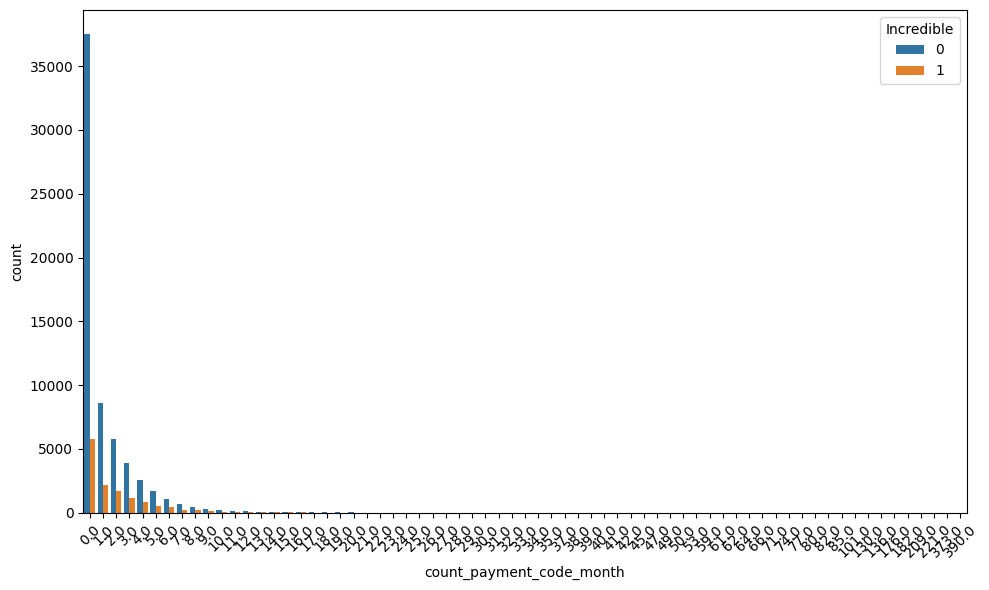

In [243]:
plt.figure(figsize=(10, 6))
sns.countplot(df_month, x='count_payment_code_month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

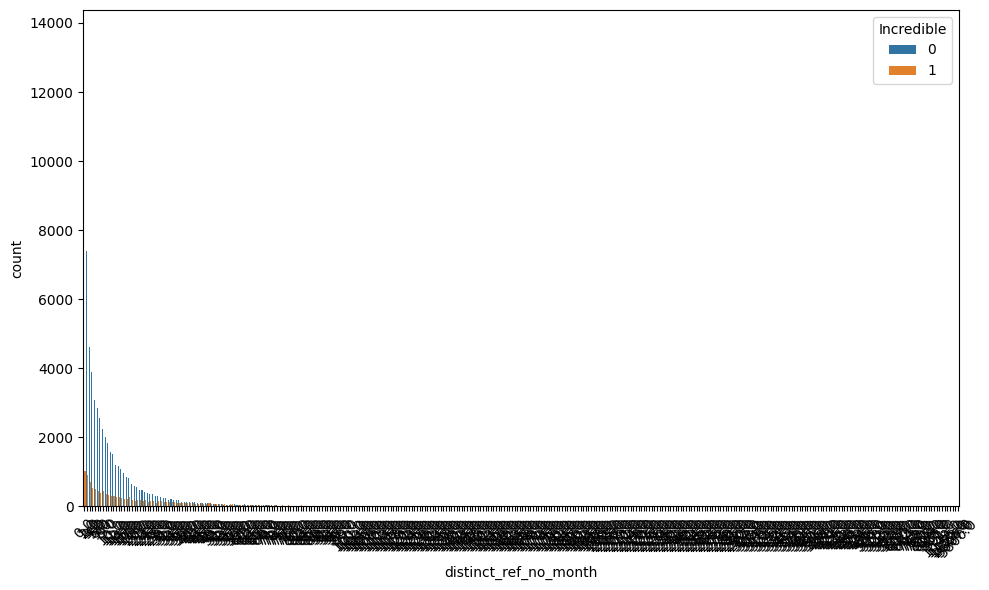

In [244]:
plt.figure(figsize=(10, 6))
sns.countplot(df_month, x='distinct_ref_no_month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Các kết quả đều giống với Dataset Week, dữ liệu và đặc điểm giao dịch của khách hàng có sự đồng nhất giữa 1 tuần và 1 tháng

### 3.3. Dataset Threemonth

- Tương tự với Dataset Week và Month

In [245]:
three_month = pd.read_csv('three_month.csv')
df_3month = pd.DataFrame(three_month)
df_3month.head()

,Male,Single,Age,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
0,1,0,29.0,7.35,40.00,0.5920,0.0,0.0,2.0,33.0,0
1,1,1,35.0,1.38,6.85,11.0318,0.0,0.0,2.0,5.0,1
2,1,0,41.0,1.57,6.00,2.1000,2.0,3.0,2.0,7.0,0
3,1,1,20.0,0.00,0.00,0.0000,0.0,0.0,1.0,1.0,0
4,1,0,32.0,7.45,38.00,0.0592,1.0,11.0,3.0,24.0,0


In [246]:
corr_matrix_3month = df_3month.corr()
corr_matrix_3month

,Male,Single,Age,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
Male,1.000000,0.081116,0.017146,-0.028257,-0.033494,-0.006129,-0.015708,0.003783,-0.050985,-0.038042,0.017441
Single,0.081116,1.000000,-0.510906,-0.067111,-0.101292,-0.015675,-0.191753,-0.085189,-0.173254,-0.071971,-0.218625
Age,0.017146,-0.510906,1.000000,0.076154,0.116543,0.027519,0.153479,0.046487,0.066662,0.019864,0.179239
amount_3month,-0.028257,-0.067111,0.076154,1.000000,0.496960,0.029822,0.080179,0.047505,0.113903,0.327071,0.113134
max_amount_3month,-0.033494,-0.101292,0.116543,0.496960,1.000000,0.310907,0.090839,0.031334,0.160678,0.137099,0.133768
min_amount_3month,-0.006129,-0.015675,0.027519,0.029822,0.310907,1.000000,-0.021403,-0.011700,-0.024792,-0.009366,-0.000952
distinct_payment_code_3month,-0.015708,-0.191753,0.153479,0.080179,0.090839,-0.021403,1.000000,0.453864,0.573543,0.222675,0.215407
count_payment_code_3month,0.003783,-0.085189,0.046487,0.047505,0.031334,-0.011700,0.453864,1.000000,0.311413,0.264666,0.097883
distinct_trans_group_3month,-0.050985,-0.173254,0.066662,0.113903,0.160678,-0.024792,0.573543,0.311413,1.000000,0.289423,0.275155
distinct_ref_no_3month,-0.038042,-0.071971,0.019864,0.327071,0.137099,-0.009366,0.222675,0.264666,0.289423,1.000000,0.151406


In [247]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_3month.columns)):
    for j in range(i):
        if abs(corr_matrix_3month.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_3month.columns[i]
            rowname = corr_matrix_3month.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('Single', 'Age')
('distinct_payment_code_3month', 'distinct_trans_group_3month')


<Axes: xlabel='distinct_payment_code_3month', ylabel='count'>

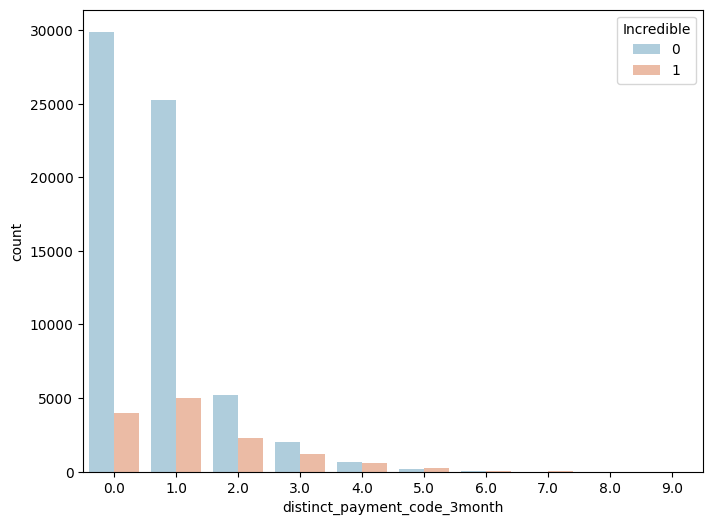

In [248]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_3month', hue='Incredible', data=df_3month, palette='RdBu_r')

<Axes: xlabel='distinct_trans_group_3month', ylabel='count'>

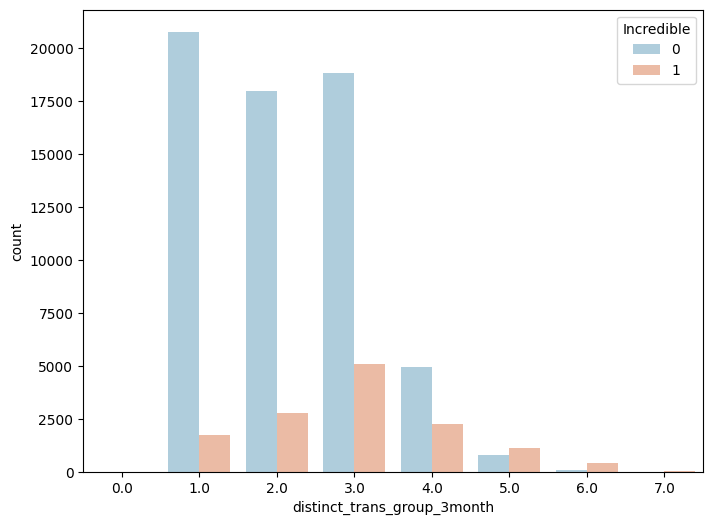

In [249]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_3month', hue='Incredible', data=df_3month, palette='RdBu_r')

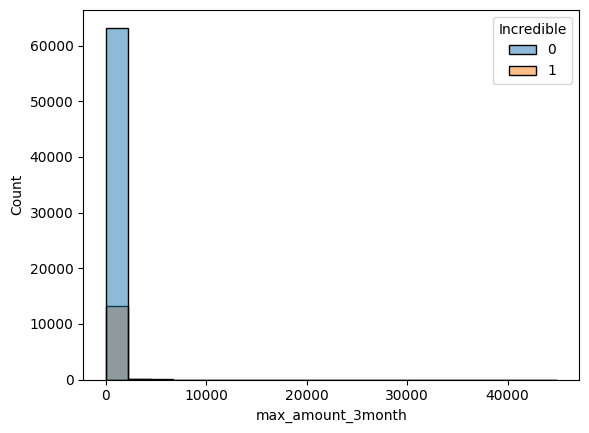

In [250]:
sns.histplot(df_3month, x='max_amount_3month', hue='Incredible', bins=20)
plt.show()

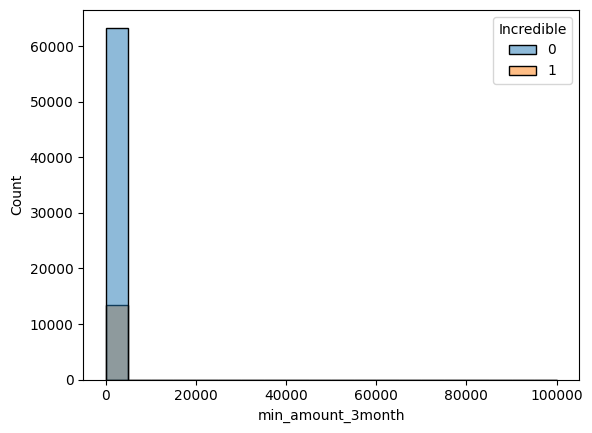

In [251]:
sns.histplot(df_3month, x='min_amount_3month', hue='Incredible', bins=20)
plt.show()

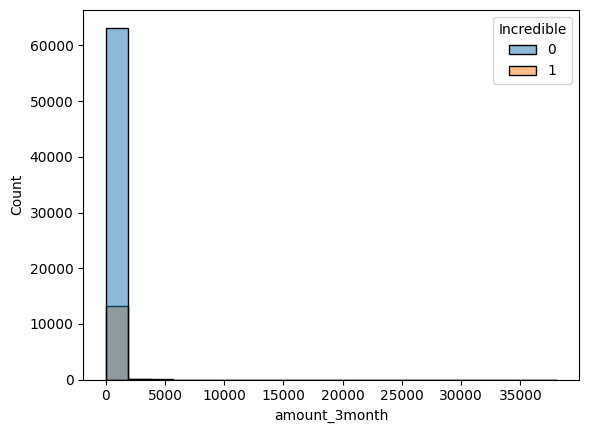

In [252]:
sns.histplot(df_3month, x='amount_3month', hue='Incredible', bins=20)
plt.show()

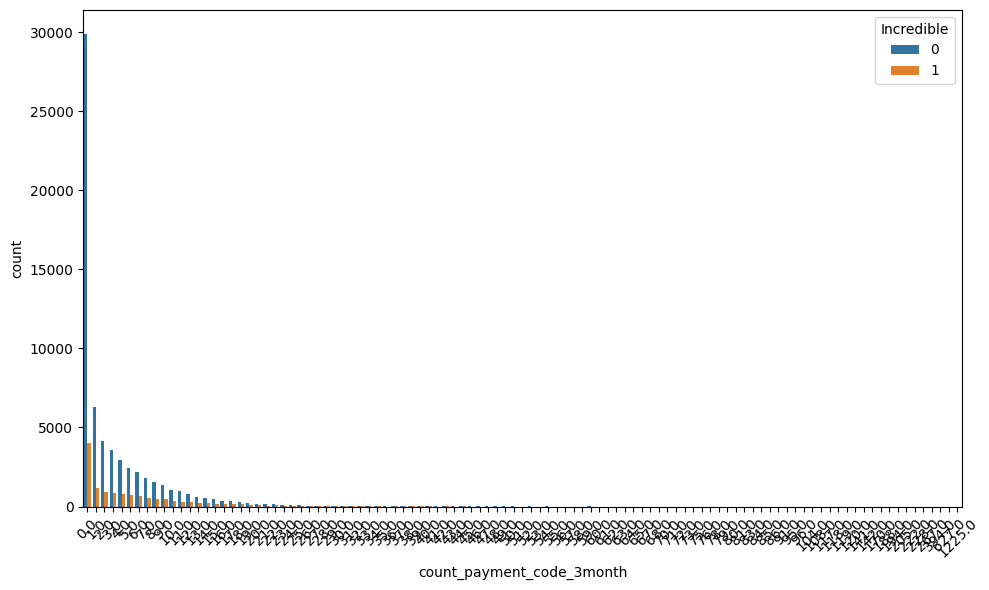

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(df_3month, x='count_payment_code_3month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

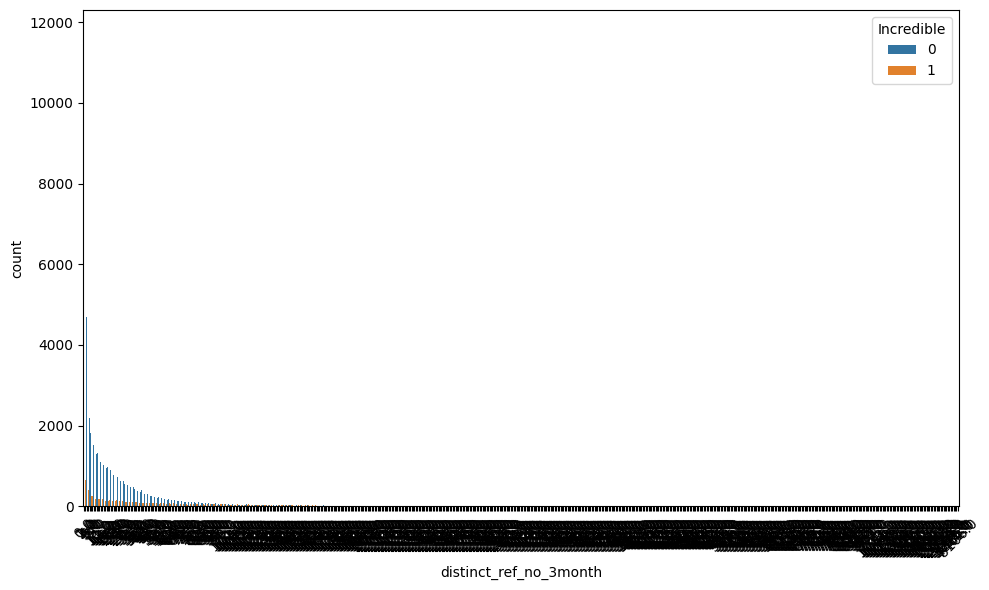

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(df_3month, x='distinct_ref_no_3month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Các kết quả đều giống với Dataset Week và Month, dữ liệu và đặc điểm giao dịch của khách hàng có sự đồng nhất giữa 1 tuần, 1 tháng và 3 tháng

## 4. Model

### 4.1. Dataset Week

- Nhóm muốn tối đa hóa khả năng phát hiện các quan sát có nhãn 1 (khách hàng đáng ngờ) nên nhóm chọn sử dụng thang đo recall cho mô hình logistic

- Chia dữ liệu thành 3 tập train, val và test

In [255]:
x_model_w = df_week.drop(columns= ['amount_week', 'distinct_trans_group_week', 'Incredible'])
y_model_w = df_week[['Incredible']]
X_train_w, X_temp_w, y_train_w, y_temp_w = train_test_split(x_model_w, y_model_w, test_size=0.4, random_state=1)
X_val_w, X_test_w, y_val_w, y_test_w = train_test_split(X_temp_w, y_temp_w, test_size=0.5, random_state=1)
print(f'Train set:{X_train_w.shape}, {y_train_w.shape}')
print(f'Validation set:{X_val_w.shape}, {y_val_w.shape}')
print(f'Test set: {X_test_w.shape}, {y_test_w.shape}')

Train set:(46008, 8), (46008, 1)
Validation set:(15336, 8), (15336, 1)
Test set: (15336, 8), (15336, 1)


- Chuẩn hóa dữ liệu bởi các biến có tập giá trị khác biệt lớn

In [256]:
scaler = StandardScaler()
X_train_sw = scaler.fit_transform(X_train_w)
X_val_sw = scaler.transform(X_val_w)
X_test_sw = scaler.transform(X_test_w)

- Xây dựng mô hình kết hợp tinh chỉnh mô hình

In [257]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]   
best_models = []
val_recalls = []

# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_sw, y_train_w)
    best_model = random_search.best_estimator_
    # Predict on validation set with best model
    val_pred = best_model.predict(X_val_sw)
    val_recall = recall_score(y_val_w, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]

# Predict in test set
y_test_pred = best_model.predict(X_test_sw)
test_recall = recall_score(y_test_w, y_test_pred)

print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]:.5f}:{test_recall:.2f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best Model: GradientBoostingClassifier(max_depth=4, n_estimators=200)
Validation Set Recall: 0.15971:0.17


### 4.2. Dataset Month

- Tương tự Dataset Week

In [258]:
x_model_m = df_month.drop(columns= ['amount_month', 'distinct_trans_group_month', 'Incredible'])
y_model_m = df_month[['Incredible']]
X_train_m, X_temp_m, y_train_m, y_temp_m = train_test_split(x_model_m, y_model_m, test_size=0.4, random_state=1)
X_val_m, X_test_m, y_val_m, y_test_m = train_test_split(X_temp_m, y_temp_m, test_size=0.5, random_state=1)
print(f'Train set: {X_train_m.shape}, {y_train_m.shape}')
print(f'Validation set: {X_val_m.shape}, {y_val_m.shape}')
print(f'Test set: {X_test_m.shape}, {y_test_m.shape}')

Train set: (46008, 8), (46008, 1)
Validation set: (15336, 8), (15336, 1)
Test set: (15336, 8), (15336, 1)


In [259]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_m)
X_val_sm = scaler.transform(X_val_m)
X_test_sm = scaler.transform(X_test_m)

In [260]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]

best_models = []
val_recalls = []
# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_sm , y_train_m)
    best_model = random_search.best_estimator_
    
    val_pred = best_model.predict(X_val_sm )
    val_recall = recall_score(y_val_m, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]

# Predict in test set
y_test_pred = best_model.predict(X_test_sm)
test_recall = recall_score(y_test_m, y_test_pred)

print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]:.5f}: {test_recall:.2f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best Model: RandomForestClassifier(min_samples_split=10, n_estimators=200)
Validation Set Recall: 0.19451: 0.21


### 4.3. Dataset Three_month

In [261]:
x_model_3m = df_3month.drop(columns= ['amount_3month', 'distinct_trans_group_3month', 'Incredible'])
y_model_3m = df_3month[['Incredible']]
X_train_3m, X_temp_3m, y_train_3m, y_temp_3m = train_test_split(x_model_3m, y_model_3m, test_size=0.4, random_state=1)
X_val_3m, X_test_3m, y_val_3m, y_test_3m = train_test_split(X_temp_3m, y_temp_3m, test_size=0.5, random_state=1)
print(f'Train set: {X_train_3m.shape}, {y_train_3m.shape}')
print(f'Validation set: {X_val_3m.shape}, {y_val_3m.shape}')
print(f'Test set: {X_test_3m.shape}, {y_test_3m.shape}')

Train set: (46008, 8), (46008, 1)
Validation set: (15336, 8), (15336, 1)
Test set: (15336, 8), (15336, 1)


In [262]:
scaler = StandardScaler()
X_train_s3m = scaler.fit_transform(X_train_3m)
X_val_s3m = scaler.transform(X_val_3m)
X_test_s3m = scaler.transform(X_test_3m)

In [263]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]

best_models = []
val_recalls = []
# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_s3m, y_train_3m)
    best_model = random_search.best_estimator_
    
    val_pred = best_model.predict(X_val_s3m)
    val_recall = recall_score(y_val_3m, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]

# Predict in test set
y_test_pred = best_model.predict(X_test_s3m)
test_recall = recall_score(y_test_3m, y_test_pred)

print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]:.5f}: {test_recall:.2f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best Model: RandomForestClassifier(max_depth=20, n_estimators=200)
Validation Set Recall: 0.25897: 0.24


- Recall của mô hình sử dụng dataset three_month trên tập val tốt nhất trong 3 mô hình => Chọn

In [264]:
best_model_3month = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)
best_model_3month.fit(X_train_s3m, y_train_3m)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

In [265]:
conf_matrix = confusion_matrix(y_val_3m, val_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12301   305]
 [ 2182   548]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


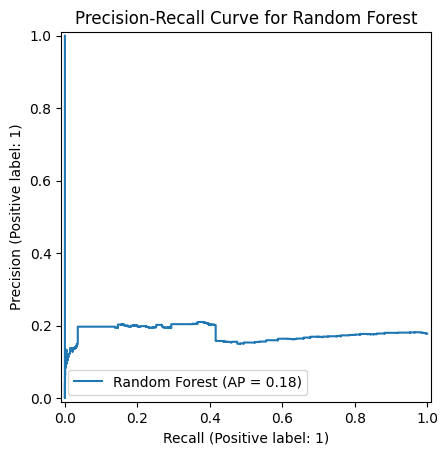

In [266]:
display = PrecisionRecallDisplay.from_estimator(best_model_3month, X_val_3m, y_val_3m, name="Random Forest")
plt.title("Precision-Recall Curve for Random Forest")
plt.show()

- Thử điều chỉnh ngưỡng quyết định nhãn 0 và 1 với mục đích giảm thiểu số nhãn 1 bị dự đoán là 0, chỉ thử trên tập val, không sử dụng tập test

In [267]:
def alter_threshold(prob_array, threshold: float):
    postive_prob_array = prob_array[:, 1]
    return (postive_prob_array >= threshold).astype(int)

In [268]:
threshold = 0.4
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print(f"Val Set Recall after threshold adjustment:  {val_recall:.5f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Val Set Recall after threshold adjustment:  0.99927


In [269]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    1 12605]
 [    2  2728]]


- Với threshold = 0.4, mô hình dự đoán hầu hết các quan sát đều là nhãn 1, điều này tương đương với việc coi tất cả các quan sát là nhãn 1 nên đây không phải ngưỡng threshold tốt

In [270]:
threshold = 0.45
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print(f"Val Set Recall after threshold adjustment: {val_recall:.5f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Val Set Recall after threshold adjustment: 0.28864


In [271]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12125   481]
 [ 1942   788]]


- Với threshold = 0.45, số nhãn 1 bị dự đoán là nhãn 0 đã giảm so với threshold = 0.4 và mô hình không dự đoán hầu hết các nhãn là 1

In [272]:
threshold = 0.46
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print(f"Val Set Recall after threshold adjustment: {val_recall:.5f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Val Set Recall after threshold adjustment: 0.99890


In [273]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    5 12601]
 [    3  2727]]


- Với threshold = 0.46, mô hình bắt đầu dự đoán hầu hết các quan sát là nhãn 1 => không tốt

In [274]:
threshold = 0.455
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print(f"Val Set Recall after threshold adjustment: {val_recall:.5f}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Val Set Recall after threshold adjustment: 0.27766


- Threshold = 0.455 cũng không phải là một threshold tốt => Nhóm chọn threshold = 0.45

In [277]:
X_train_df = pd.DataFrame(X_train_s3m)
X_val_df = pd.DataFrame(X_val_s3m)
y_train_df = pd.DataFrame(y_train_3m)
y_val_df = pd.DataFrame(y_val_3m)

# Kết hợp các DataFrame
X_combined_df = pd.concat([X_train_df, X_val_df], axis=0).reset_index(drop=True)
y_combined_df = pd.concat([y_train_df, y_val_df], axis=0).reset_index(drop=True)

# Chuyển đổi lại sang numpy array
X_combined_s3m = X_combined_df.to_numpy()
y_combined_3m = y_combined_df.to_numpy().ravel()
# Bước 1: Điều chỉnh ngưỡng quyết định
threshold = 0.45
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_combined_s3m), threshold)

# Bước 2: Huấn luyện lại mô hình trên dữ liệu kết hợp với ngưỡng đã điều chỉnh
best_model_3month.fit(X_combined_s3m, y_combined_3m, sample_weight=train_val_pred_after_threshold)

# Bước 3: Đánh giá trên tập test
test_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_test_s3m), threshold)
test_recall = recall_score(y_test_3m, test_pred_after_post_tuning)

print(f"Val Set Recall after threshold adjustment: {val_recall:.5f}")

Val Set Recall after threshold adjustment: 0.27766


In [276]:
conf_matrix = confusion_matrix(y_test_3m, test_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   14 12645]
 [   12  2665]]


## 5. Kết quả và thảo luận

- Ngân hàng có thể xác định khách hàng đáng ngờ chính xác nhất sau 9 tháng. Nhưng nếu cần nhanh hơn, ngân hàng hoàn toàn có thể xác định khách hàng đáng ngờ sau 3 tháng, tuy kết quả không tốt bằng xác định sau 9 tháng nhưng phần chênh lệch là không đáng kể 

- Để tối đa hóa việc phát hiện nhãn 1 mà không quy tất cả khách hàng là đáng ngờ, với bộ dữ liệu này nên để ngưỡng quyết định nhãn 1 là 0,45 chứ không nên để mặc định 0,5

- Recall = 0.278 ở mức khá bình thường

- Ma trận nhiễu:

<b> True Negative (TN)</b>: Có 14 mẫu được dự đoán là 0 và thực tế là 0.

<b> False Positive (FP)</b>: Có 12645 mẫu bị dự đoán là 1 nhưng thực tế là 0.

<b> False Negative (FN)</b>: Có 12 mẫu bị dự đoán là 0 nhưng thực tế là 1.

<b> True Positive (TP)</b>: Có 2665 mẫu được dự đoán là 1 và thực tế là 1.

=> Mô hình có 12 quan sát nhãn 1 (đáng ngờ) nhưng bị xếp loại là 0 (không đáng ngờ). Tuy nhiên đây là một kết quả tốt bởi không mô hình nào là hoàn hảo, đây là mô hình không quy tất cả khách hàng là đáng ngờ, tiết kiệm tài nguyên theo dõi và là mô hình tốt nhất trong các mô hình được tinh chỉnh

- Mức độ đóng góp của các biến

In [278]:
df_3month.columns

Index(['Male', 'Single', 'Age', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible'],
      dtype='object')

In [279]:
feature_names = ['Male', 'Single', 'Age', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month',
       'distinct_ref_no_3month']
X_combined_s3m = pd.DataFrame(X_combined_s3m, columns=feature_names)
feature_importances = best_model_3month.feature_importances_

# Tạo DataFrame để hiển thị kết quả
importance_df = pd.DataFrame({
    'Feature': X_combined_s3m.columns,
    'Importance': feature_importances
})

# Sắp xếp các biến theo mức độ quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

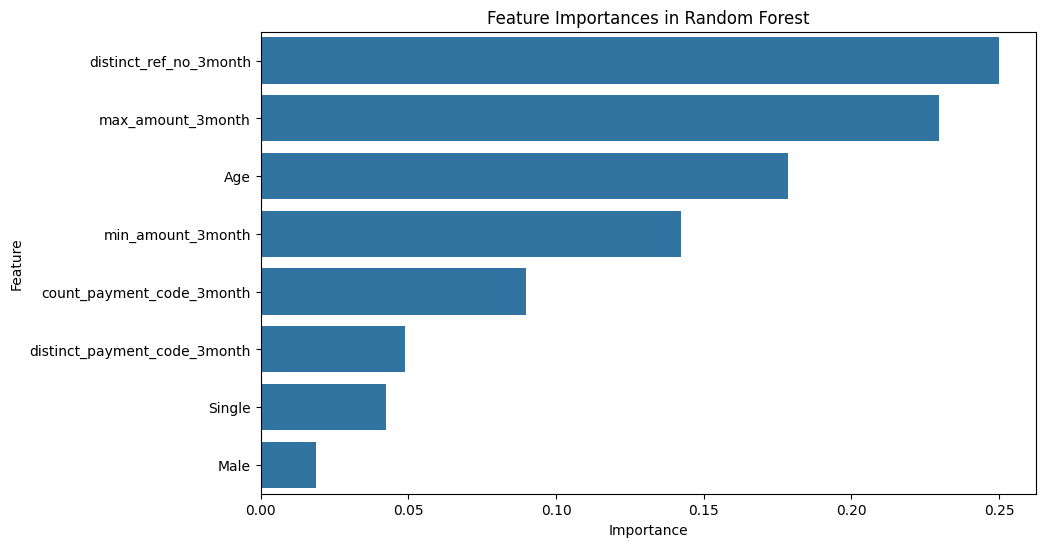

In [280]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()

viết kết luận ....